In [103]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [11]:
## change working directory
os.chdir("/Volumes/Data/Daily/Hybrid/CourseWork/5206-DS/")
os.getcwd()

'/Volumes/Data/Daily/Hybrid/CourseWork/5206-DS'

The function *shape* provides the dimension of the dataframe

In [13]:
housing = pd.read_csv("/Volumes/Data/Daily/Hybrid/CourseWork/5206-DS/NYChousing.csv")
housing.shape

(2506, 22)

In [14]:
## checking the missing data
pd.isnull(housing).sum()

UID                                  0
PropertyName                         0
Lon                                 15
Lat                                 15
AgencyID                             0
Name                                11
Value                               52
Address                             45
Violations2010                       0
REACNumber                        1873
Borough                              0
CD                                   0
CityCouncilDistrict                 10
CensusTract                         19
BuildingCount                        0
UnitCount                            0
YearBuilt                            0
Owner                               29
Rental.Coop                          0
OwnerProfitStatus                 1164
AffordabilityRestrictions            0
StartAffordabilityRestrictions       5
dtype: int64

**dropna** allows us drop all the rows containing missing values

In [18]:
housing.dropna().shape

(96, 22)

In [20]:
## drop the columns which contain missing values
housing.dropna(axis = 1).shape

(2506, 11)

In [47]:
## find the index of the Value with data
ind = housing[['Value']].isnull() == False
ind = ind.iloc[:,0]

In [49]:
housing.shape[0] - housing.loc[ind].shape[0]
# in total there are 52 missing values happened in the variable Value

52

In [51]:
## then remove the 52 rows
housing = housing.loc[ind]

**np.log** calculate the log

In [79]:
## create a new variable 
housing[['logValue']] = np.log(housing[['Value']])
housing.shape ## check

(2454, 23)

**describe** helps us get the general infomation of the variable

In [81]:
housing[['logValue']].describe()

,logValue
count,2454.000000
mean,13.682298
std,1.810169
min,8.410053
25%,12.491402
50%,13.748183
75%,14.803136
max,20.471819


In [83]:
housing[['logUnits']] = np.log(housing[['UnitCount']])
type(np.log(housing[['UnitCount']]))

pandas.core.frame.DataFrame

In [84]:
housing[['after1950']] = housing[['YearBuilt']] >=1950

## Part 2: EDA

Text(0.5, 0, 'log(Value)')

Text(0, 0.5, 'log(Units)')

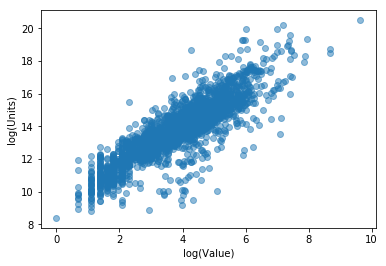

In [97]:
plt.scatter('logUnits', 'logValue', data = housing, alpha = 0.5)
plt.xlabel('log(Value)')
plt.ylabel('log(Units)')

**lmplot** can create a scatter plot with linear regression line

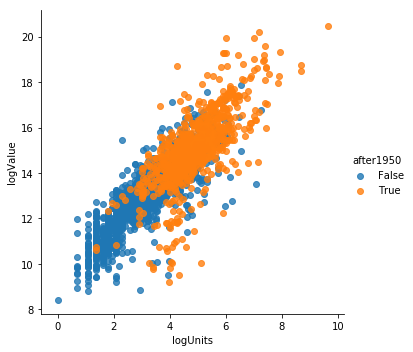

In [106]:
sns.lmplot('logUnits', 'logValue', data = housing, hue = 'after1950', fit_reg = False)

In [135]:
## overall correlation coefficient
housing[['logUnits', 'logValue']].corr().iloc[0,1]

0.8727348173470239

In [198]:
## each group's correlation coefficient
housing.groupby('Borough')['logUnits'].corr(housing['logValue'])[['Brooklyn', 'Manhattan']]

Borough
Brooklyn     0.910260
Manhattan    0.883035
Name: logUnits, dtype: float64

In [196]:
housing.groupby('after1950')['logUnits'].corr(housing['logValue'])

after1950
False    0.864330
True     0.721735
Name: logUnits, dtype: float64

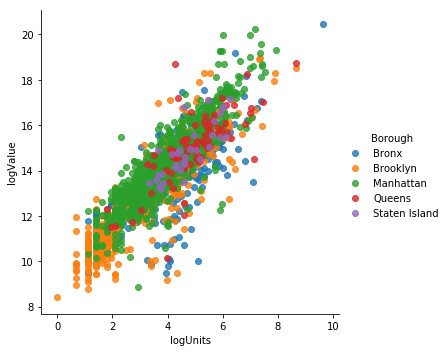

In [200]:
sns.lmplot('logUnits', 'logValue', data = housing, hue = 'Borough', fit_reg = False)

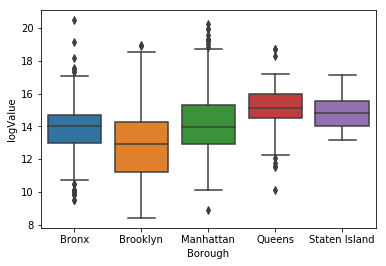

In [173]:
## create boxplots over Boroughs
sns.boxplot('Borough', 'logValue', data = housing)

In [192]:
## calculate the median
housing.groupby(['Borough'])['Value'].median()

Borough
Bronx            1192950.0
Brooklyn          417610.0
Manhattan        1172362.0
Queens           3611700.0
Staten Island    2654100.0
Name: Value, dtype: float64